## Desenvolvimento de um modelo de regressão linear para encontrar o valor de casas ocupadas nos EUA pelos proprietários em 1.000 USD, baseados em base de dados disponibilizada pelo Biblioteca Keras.

Link da documentação dos dados que serão coletados
* https://keras.io/2.16/api/datasets/boston_housing/

Link dos dados
* http://lib.stat.cmu.edu/datasets/boston

Modelo dos dados e suas categorias:
- Taxa de criminalidade per capita por cidade.
- Proporção em relação a terrenos residenciais zoneados em lotes acima de 25.000 pés quadrados.
- Proporção em relação a hectares de terrenos não varejistas por cidade
- Proporção em relação a terrenos alocados com rios
- Concentração de óxidos nítricos medidos no terreno (partes por 10 milhões)
- Número médio de quartos por habitação no mesmo loteamento
- Proporção de unidades ocupadas (loteamento) e construídas antes de 1940
- Distâncias ponderadas para cinco centros de emprego de Boston
- Índice de acessibilidade às rodovias radiais
- Taxa média de imposto de propriedade de valor (escalonado por 10.000)
- Proporção alunos por professor por cidade
- Proporção de negros por cidade (por mil habitantes)
- Percentual de status mais baixo da população
- Valor médio de casas (escalonado por 1.000)

In [44]:
# Instalando dependencias do projeto
%pip install -q -U tensorflow
%pip install -q -U keras
%pip install -q -U numpy
%pip install -q -U pandas
%pip install -q -U tensorflow-addons
%pip install -q -U keras-utils
%pip install pydot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [53]:
# Importação das bibliotecas, módulos e pacotes que serão usados
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [32]:
# Definindo Variável que vai servir de controladora dos dados que vem da biblioteca
data = tf.keras.datasets.boston_housing

# Carregamento dos dados de treino e teste
(x_train, y_train), (x_test, y_test) = data.load_data()
# A divisão dos dados é feita de forma automática pela biblioteca
# O tipo do dado é numpy.ndarray, ou seja uma matriz de dados

In [33]:
# Exemplo dos dados que serão utilizados
print(x_test)

# Formato dos dados que serão utilizados para treino
print(x_train.shape) # (404, 13) que equivale a 404 dados distribuídos em 13 categorias diferentes
print(x_test.shape) # (102, 13) que equivale a 102 dados distribuídos em 13 categorias diferentes

[[1.80846e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.72500e+01
  2.90500e+01]
 [1.23290e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.94950e+02
  1.62100e+01]
 [5.49700e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.96900e+02
  9.74000e+00]
 ...
 [1.83377e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.89610e+02
  1.92000e+00]
 [3.58090e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.91700e+02
  9.71000e+00]
 [2.92400e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.40160e+02
  9.81000e+00]]
(404, 13)
(102, 13)


In [34]:
# Verificando a primeira amostra da base de treino
print(x_train[0])

# Verificando a primeira amostra da base de teste
print(y_train[0]) 

# A lógica utilizada é que o X contém as 13 categorias da casa, e o Y o valor dela

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [35]:
# Agora fazemos o pré-processamendo dos dados a partir da normalização,
# garantindo que as características das casas tenhasm a mesma escala fazendo,
# a melhora do treinamento e da convergência do modelo

# Calculamos a média dos valores das características
# axis = 0, a operação é realizada ao longo das colunas da matriz.
media = x_train.mean(axis = 0)
# Calculo do desvio padrão das características
desvio = x_train.std(axis = 0)

# Feito a normalização dos dados
x_train = (x_train - media) / desvio 
x_test = (x_test - media) / desvio

In [56]:
# Definição do modelo

# Funcao Sequencial para criar um modelo sequencial na rede neural e cada Dense e uma camada da rede neural
model = Sequential([ 
    Dense(units = 64, # primeira camada, e units é numero de neuronios que serao alimentados pelas 13 categorias
                        # cada neuronio está conectado com todos os anteriores e com todos os posteriores
        activation = 'relu', # metodo de ativacao chamado 'relu'(unidade linear retificada) que atua nos 13, multiplicado por um peso, aplicado funcao degrau e jogado para um neuronio 
                                # ativação comumente usada que retorna 0 para valores negativos e o próprio valor para valores positivos. Ela introduz não-linearidade na rede, 
                                # o que é importante para a capacidade de aprendizado da rede.
        input_shape = [13]), # explica que vai haver uma entrada com 13 dimensões diferentes, já que temos 13 categorias
    Dense(units = 64, # segunda camada do modelo que recebe os dados da primeira
        activation = 'relu'),
    Dense(units = 1) # ultimo neuronio que recebe o valor final que é o preço da casa
])

c:\Users\junio\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
# Mostra como ficou a estrutura do nosso modelo
model.summary()
# param = input_shape * units + units -> para cada camada sendo o input_shape o valor da quantidade de entradas que vem da camada anterior

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Configurar os parâmetros do modelo antes do treinamento
model.compile(optimizer = 'adam', # Usado para atualizar os pesos durante o treinamento, para minimizar a função de perda
    loss = 'mse', # erro quadrático médio, usado para identificar a taxa de perda, faz com que o modelo se ajuste dependendo do valor
    metrics = ['mae']) # erro absoluto médio, métricas de autoavaliação do modelo para cada final de época saber o desempenho do modelo

In [62]:
# Medindo o tempo de execução para acompanhamento do processo
%time

# Treinamento do modelo e coleta do histórico
# A função .fit treina o modelo, e quando associado a uma variável ele gaurda seu histórico de processamento
history = model.fit(
    x_train,
    y_train,
    epochs = 100, # épocas de treinamento
    validation_split = 0.2 # Utilizado para identificar a porcentagem de dados que serão usados para validação durante treinamento
)

CPU times: total: 0 ns
Wall time: 535 µs
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 557.2337 - mae: 21.7009 - val_loss: 564.0181 - val_mae: 22.6052
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 494.8836 - mae: 20.3541 - val_loss: 510.2981 - val_mae: 21.3707
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482.0613 - mae: 19.5896 - val_loss: 442.1170 - val_mae: 19.6909
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 396.7126 - mae: 17.6353 - val_loss: 359.7396 - val_mae: 17.4778
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 290.4507 - mae: 14.9543 - val_loss: 268.9554 - val_mae: 14.5815
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 213.6496 - mae: 12.2538 - val_loss: 187.5272 - val_mae: 11.4820
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 145.2527 - mae: 9.5783 - val_loss: 132.4444 - val_mae: 9.1567
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 97.0817 - mae: 7.6524 - val_loss: 1

In [63]:
# Verificando as chaves dos dados e os dados
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
{'loss': [539.197998046875, 481.0898132324219, 485.6094055175781, 372.11346435546875, 273.3506774902344, 187.65867614746094, 122.42528533935547, 85.4424057006836, 66.54796600341797, 56.75185775756836, 47.84604263305664, 43.91070556640625, 36.30436706542969, 34.44382095336914, 29.457744598388672, 26.744651794433594, 26.216453552246094, 25.014387130737305, 25.289487838745117, 25.82048797607422, 21.964975357055664, 20.692020416259766, 20.863433837890625, 19.07404327392578, 18.881790161132812, 20.42754554748535, 17.925983428955078, 18.26498794555664, 17.4040470123291, 15.951281547546387, 15.813458442687988, 17.378461837768555, 15.387248992919922, 15.500643730163574, 14.95278549194336, 13.762145042419434, 15.070209503173828, 15.554218292236328, 12.855670928955078, 12.557857513427734, 13.088662147521973, 12.25540542602539, 12.671558380126953, 12.392111778259277, 12.093369483947754, 11.317992210388184, 10.973459243774414, 11.201523780822754, 1

In [67]:
# Avaliando o modelo
loss, mae = model.evaluate(x_test, y_test)
# Loss significa a discrepancia médias entre os valores previstos e os valores reais, isso quando erra o valor
# Mae significa quanto o modelo está errando ao prever os preços.
# Resumindo, Loss é para a variação do valor errado, e Mae e a variação de acertos do valor

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.3515 - mae: 2.8714 


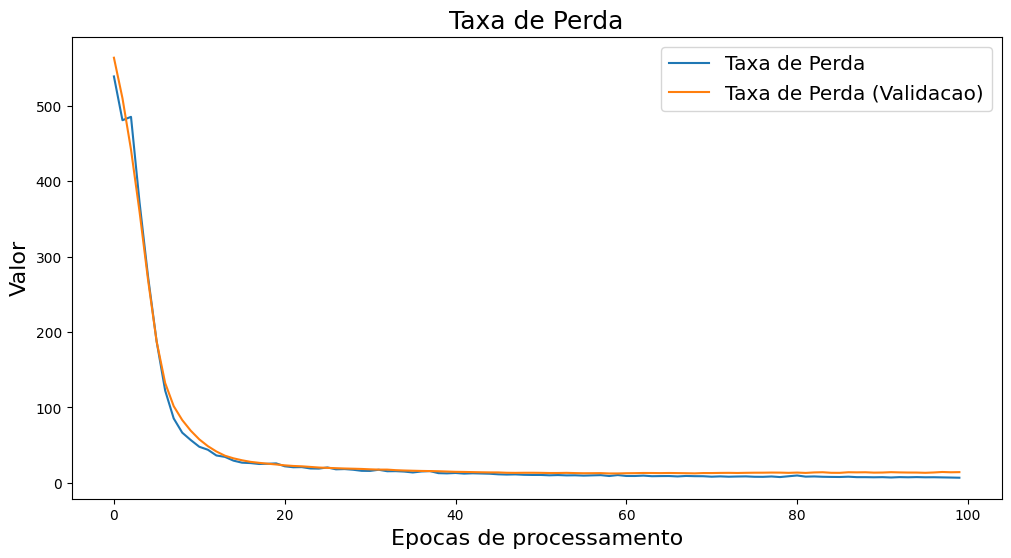

In [68]:
# Criando gráfico para analisar o comportamento de perda (loss) do modelo, no momento do treinamento
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Taxa de Perda',
            'Taxa de Perda (Validacao)'],
            loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()

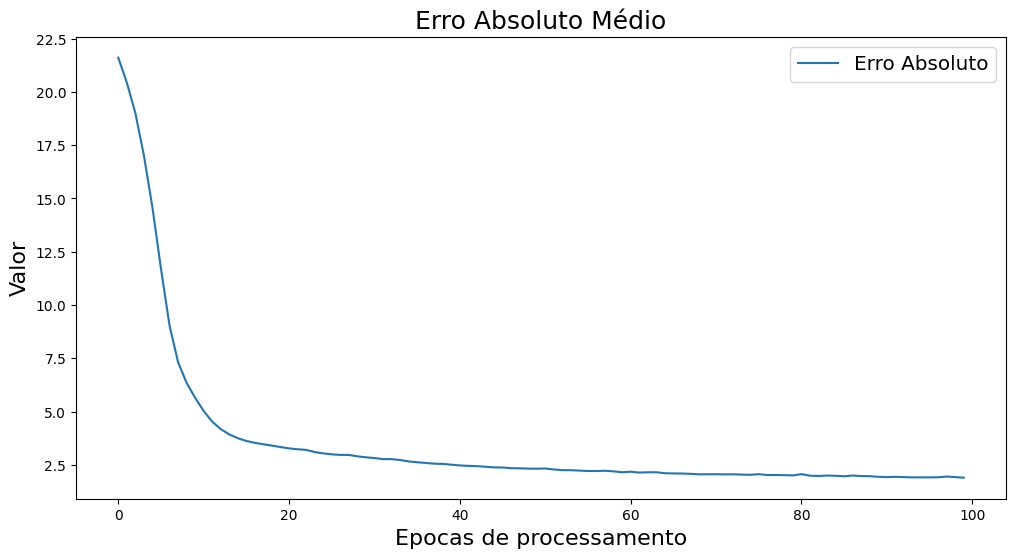

In [69]:
# Criando gráfico para análise de erro de acordo com as épocas de processamento
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(history.history['mae'])
plt.legend(['Erro Absoluto'],
            loc = 'upper right', fontsize = 'x-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Valor', fontsize=16)
plt.title('Erro Absoluto Médio', fontsize=18)
plt.show()

De acordo com os gráfico acima, podemos perceber a queda abrupta dos erros cometidos pelos modelos durante as épocas de procesamento.  
Isso demonstra que o modelo realmente aprendeu a partir dos dados e dos pesos estabelecidos por ele de acordo com sua configuração.  
Atualmente o modelo está com uma taxa de Loss = 31.35% e uma taxa de erro (mae) = 2.87%.  

In [87]:
# Testes sobre novas amostras
x_new = x_test # Coletando os 10 primeiros valores da variável

# Fazendo uma predição dos valores das novas amostras
y_pred = model.predict(x_new)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [88]:
# Fazendo uma comparação dos dados recebidos pela predição e dos dados reais
print("Dados Previstos: {}".format(y_pred))
print("Dados Reais: {}".format(y_test))

Dados Previstos: [[ 8.759466 ]
 [18.256752 ]
 [21.100433 ]
 [31.126232 ]
 [24.952793 ]
 [18.956196 ]
 [26.293392 ]
 [21.293602 ]
 [19.395576 ]
 [21.755163 ]
 [19.06115  ]
 [17.306332 ]
 [15.255468 ]
 [41.233147 ]
 [18.912811 ]
 [19.358017 ]
 [26.843857 ]
 [21.679472 ]
 [18.92221  ]
 [36.197845 ]
 [11.821631 ]
 [15.987451 ]
 [20.163488 ]
 [15.243279 ]
 [21.66683  ]
 [24.739567 ]
 [30.595987 ]
 [30.023838 ]
 [10.963449 ]
 [21.583548 ]
 [18.808521 ]
 [14.905574 ]
 [32.539066 ]
 [25.499825 ]
 [17.47048  ]
 [ 8.828641 ]
 [15.330592 ]
 [17.851227 ]
 [18.137917 ]
 [24.988026 ]
 [29.518826 ]
 [28.47947  ]
 [14.692948 ]
 [40.000904 ]
 [29.67275  ]
 [24.930056 ]
 [25.544212 ]
 [16.135548 ]
 [23.654892 ]
 [21.71847  ]
 [33.466396 ]
 [19.019985 ]
 [12.185155 ]
 [16.309711 ]
 [34.983322 ]
 [27.262255 ]
 [13.034318 ]
 [47.58879  ]
 [34.046165 ]
 [23.754326 ]
 [24.965141 ]
 [17.618559 ]
 [14.436959 ]
 [17.757412 ]
 [22.817867 ]
 [22.35725  ]
 [13.262819 ]
 [21.758274 ]
 [12.703397 ]
 [ 6.4622493]
 [3

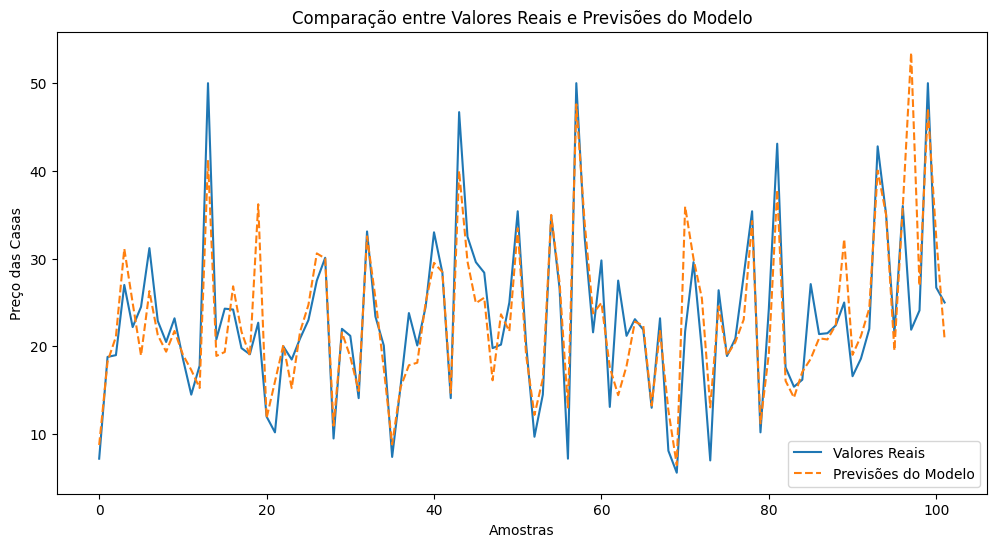

In [89]:
y_pred_list = [pred[0] for pred in y_pred]

# Plotar os valores reais e as previsões do modelo
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred_list, label='Previsões do Modelo', linestyle='--')
plt.xlabel('Amostras')
plt.ylabel('Preço das Casas')
plt.title('Comparação entre Valores Reais e Previsões do Modelo')
plt.legend()
plt.show()

* De acordo com os gráficos podemos verificar que o modelo está fazendo uma previsão aproximada dos valores reais, ainda contando com alguns erros de predição.
* Algumas das soluções que poderíamos aplicar para melhorar a predição do modelo seria o ajustes dos hiperparâmetros, aumentar a quantidade de dados,
utilizar redes neurais mais complexas, entre diversos outras possíveis técnicas de melhoria do modelo.